# Chapter 3. Classification

**Fetches the MNIST dataset**

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist=fetch_openml('mnist_784',version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**Common structures of Datasets loaded by SK-Learn**
1. **A** DESCR **key describing the dataset**
1. **A** data **key containing an array with one row per instance one column per feature**
1. **A** target **key containing an array with labels**

In [7]:
X,y=mnist["data"],mnist["target"]

In [9]:
X.shape#70,000 images, and each image has 784 features

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

**Each image is 28*28 pixels, and each feature simply represents one pixel'sintensity**

In [12]:
some_digit=X[0]

In [13]:
some_digit_image=some_digit.reshape(28,28)

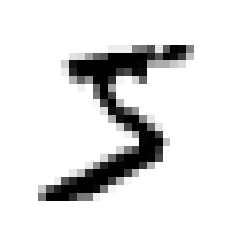

In [15]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [16]:
y[0]

'5'

**Cast labels to numbers**

In [17]:
import numpy as np

In [19]:
y=y.astype(np.uint8)

**Train-Test Split**

In [20]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[6000:]

## Training a Binary Classifier
***Binary classifier:*Capable of distinguishing between just two classes, 5 and not 5.**

In [21]:
y_train_5=(y_train==5)#True for all 5s, False for all other digits

In [22]:
y_test_5=(y_test==5)

**Using *Stochastic Gradient Descent(SGD)* classifier, using SK-Learn's** SGDClassifier **class.**<br>
* **This classifier has the advantage of being capable of handling vey large datasets efficeintly**
* **SGD dealws with training instances independently, one at a time**
* **SGDClassifier relies on randomness during training. If you want reproduce results, you should set the random_state parameter**

In [23]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf=SGDClassifier(random_state=42)

In [27]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

## Performance Measures
### Measuring Accuracy Using Corss-Validation

**Same as SK-Learn's** cross_val_score( ) **function and prints the same result**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

**Cross-validation using** cross_val_score( ) **function, with k-fold cross-validation of three folds** 

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

**A classifer that just classifies evert single image in the "not-5" class"**

In [31]:
from sklearn.base import BaseEstimator

In [39]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [40]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

**Accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets(some classes are more frequent than the others)**

### Confusion Matrix
**Evaluate the performance of a classifier using a *confusion matrix***
* **The general idea is to count the number of times instances of class A are classified as class B**
* **You need to have a set of predictions so that they can be compared to the actual target**
* **The** cross_val_predict( ) **performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold**
* **You get a clean prediction for each instance in the training set**

In [42]:
from sklearn.model_selection import cross_val_predict

In [44]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

**Build the confusion matrix**<br>
* **Each row in a confusion matrix represents an actual class, while each columns represents a predicted class**
* **A perfect classifer would have only true positives and true negatives, so its confusion matrix would have nonzero values on its main diagonal**

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

### Precision and Recall
**Precision: True Positives/(True Positives+False Positives)**<br>
**Recall:（*sensitivity of the true positive rate*）：True Positive/(True Positive+False Negative) Ratio of the positive instances that are correctly detected by the classifier** <br>

In [49]:
from sklearn.metrics import precision_score, recall_score

In [51]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [52]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

**F1 score: *harmonic mean* of precision and recall. The harmonic mean gives much more weight to low values, as a resultm the classifier will only get a high F1 score if both recall and precision are high**

In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

**The F1  score favors classifier that have similar precision and recall**<br>

### Precision/Recall Trade-off
**SK-Learn does not let you set the threshold directly, but it does give access to the decision scores that it uses to make predictions**<br>
**Call the** decision_function( ) **method, which returns a score for each instance, and the use any threshold you want to make predictions based on those scores**

In [59]:
y_scores=sgd_clf.decision_function([some_digit])

In [60]:
y_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [63]:
threshold=8000

In [64]:
y_some_digit_pred=(y_scores>threshold)

**Raising the threshold decreases recall**

In [66]:
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

**How do you decide the threshold**<br>
**Use the** cross_val_predict( ) **function to get the scores of all instances in the  training set, specify the return to be decision scores**

In [68]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                          method="decision_function")

In [71]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

**Use Matplotlib to plot precision and recall as functions of the threshold value**<br>
* **Precision may sometimes go down when you raise the threshold**<
* **Recall can only go down when the threshold is increased**

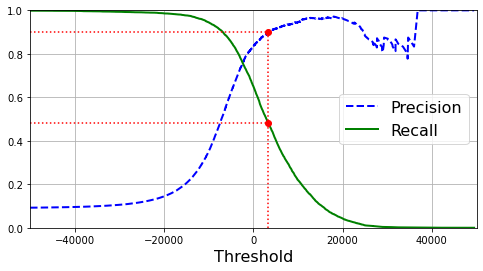

In [73]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown                                     # Not shown
plt.show()

**Plot precision directly against recall**

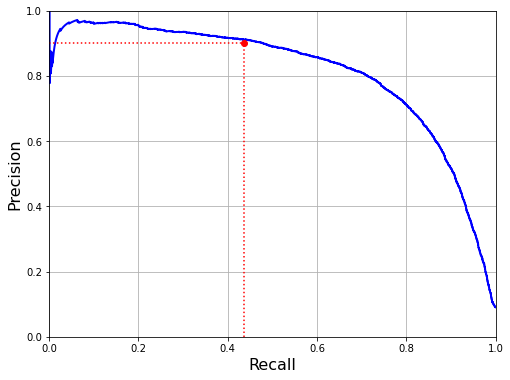

In [75]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

**Looking for a 90% precision**
* **Search for the lowest threshold that gives you at least 90% precision(Use** np.argmax( ) **will give you the first index of the maximum value)**

In [76]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.9)]

In [77]:
threshold_90_precision

3370.0194991439557

**To make predictions using a custom threshold**

In [78]:
y_train_pred_90=(y_scores>=threshold_90_precision)

In [79]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [81]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

### The ROC Curve
* **The *receiver operating characteristic(ROC)* curve plots the *true positive rate(recall)* against the *false positive rate(FPR)**
* **The FPR is the ratio of negative instances that are incorrectly classified as positive**
* ***FPR=(1-True Negative Rate)***
* **TNR: the ratio of negative instances taht are correctly classified as neagtive, also called specificity**
* ***ROC cuve plots the sensitivity(recall) versus 1-specificity***

In [82]:
from sklearn.metrics import roc_curve

In [83]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

* **The higher the recall,the more false positives(FPR) the classifier produces**
* **The dotted line represents the ROC curve of a purely random classifier; a good classifer stays as far away from the line as possible**

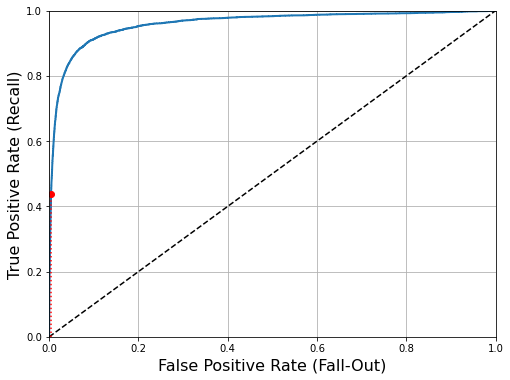

In [84]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

**Area under the curve(AUC): A perfect classifier will have a ROC AUC eqaul to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5**

In [85]:
from sklearn.metrics import roc_auc_score

In [86]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

**ROC vs PR Curve: whenever the positive class is rare or when you care more about the false positives than the false negatives, use PR curve.Otherwise, use ROC curve**

**Using** RandomForestClassifier<br>
* RandomForestClassifier **does not have a** decision_function( ) **method**
* **It has a** predict_proba( ) **method that returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the giveb class**

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
forest_clf=RandomForestClassifier(random_state=42)

In [89]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                 method="predict_proba")

In [92]:
y_scores_forest=y_probas_forest[:,1]#scre=porbabilities of positive class

In [91]:
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

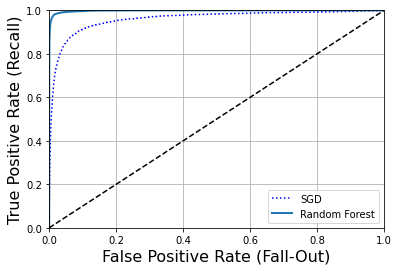

In [96]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [97]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

## Multiclass Classification
***multiclas classifiers* can distinguish between more than two classes**
#### One-versus-the-rest strategy: 
* **Classify the digit images into 10 classes, one for each digit.When needing to classify an image, you get the decision score from each classifier, and you select the classifer outputting the highest score**

#### One-versus-one strategy: 
* **Train a binary classifer for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s. When there are N classes, you need to train N*(N-1)/2 classifiers.**
* **Each classifier only needs to be trained on the part of yhe training set for the two classes that it must distinguish**

**For most binary classification algorithms, OvR is prefered**<br>
**SK-Learn detects when you try to use a binary classification algorithm fro a multiclass classification task, and automatically runs OvR or OvO depending on the algorithm**

**Support Vector Machine(SVM)**

In [98]:
from sklearn.svm import SVC

In [99]:
svm_clf=SVC()

**Ttains the SVC on the training set using the original target classes from 0 to 9, instead of the 5-versus-the-rest target classes**

In [100]:
svm_clf.fit(X_train,y_train)

SVC()

**Calling the decision_function( ) method will return 10 scores per instance**

In [101]:
some_digit_scores=svm_clf.decision_function([some_digit])

In [102]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

**The highest scores for the digit instance**

In [103]:
np.argmax(some_digit_scores)

5

In [104]:
svm_clf.classes_[5]

5

**Forcing SK-Learn to use one-versus-one or one-versus-the-rest, you can use the** OneVsOneClassifier **or** OneVsRestClassifier<br>
**Create an instance and pass a classifier to its constructor**

In [105]:
from sklearn.multiclass import OneVsRestClassifier

In [109]:
ovr_clf=OneVsRestClassifier(SVC())

In [110]:
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [112]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

**Training an SGDClassifier using OvR strategy: 10 classes, trained 10 binary classifiers**

In [113]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [114]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [115]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

**Evaluating the classifier**

In [116]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

**Scaling the input to increase accuracy**

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler=StandardScaler()

In [120]:
X_train_scaled=scaler.fit_transform(X_train.astype((np.float64)))

In [123]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis
1. **Look at the confusion matrix:Make predictions using the** cross_val_predict( ) **function, then calls the** confusion_matrix( )

In [125]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

In [126]:
conf_mx=confusion_matrix(y_train,y_train_pred)

In [127]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

**Looking at an image representation of the confusion matrix,using Marplotlib's** matshow( ) **function**

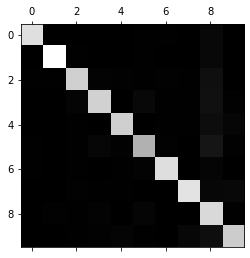

In [128]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

**Plotting the errors**<br>
1. **Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare the error rates instead of absolute number of errors(which would make abundant classes look unfairly bad)**
1. **Fill the diagoinal with zeros to keep only the errors and plot the result**
1. **Analyzing individual errors can be a good way to gain insights on what your classifier is doing and why it is failing**

In [129]:
row_sums=conf_mx.sum(axis=1,keepdims=True)

In [130]:
norm_conf_mx=conf_mx/row_sums

In [131]:
np.fill_diagonal(norm_conf_mx,0)

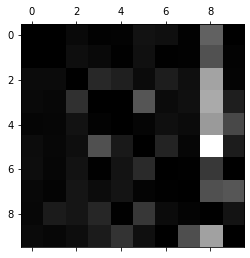

In [132]:
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

## Multilabel Classification
**A classification system that outputs multple binary tags**

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
y_train_large=(y_train>=7)

In [135]:
y_train_odd=(y_train%2==1)

**Creates a** y_multilabel **containing two target labels for each digit image: the first indicates whether or not the digit is large, the second indicates whether or not it is odd.**

In [136]:
y_multilabel=np.c_[y_train_large,y_train_odd]

In [137]:
knn_clf=KNeighborsClassifier()

In [138]:
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

**Predictions output two labels**

In [139]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Measure the F1 score for each individual label, then simply compute the average score**

In [140]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")#can also pass average='weighted'

0.976410265560605

## Multioutput Classification
**A generalization of multilabel classification where each lable can be multiclass(have more than two possible values)**

* **Build a system that removes noise from imagesL Will take as input a noisy image, and it will(hopefully) output a clean digit image, represented as an array of pixel intesities**<br>
* **The classifier's output is multilabel,and each lable can have multiple values**

NameError: name 'plot_digit' is not defined

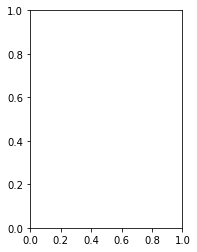

In [144]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

**An image from the test set**

some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

**Train the classiier in producing a clean image**

In [145]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'plot_digit' is not defined